In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
from plotly.offline import init_notebook_mode
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy

In [2]:
tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
nltk.download('stopwords')
lemm = WordNetLemmatizer()
init_notebook_mode(connected=True)
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 18

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
data = pd.read_csv("https://s3.us-west-1.wasabisys.com/dphi/datasets/262/Train_Data.csv?AWSAccessKeyId=ABSZWDH67WW3G8YX40WD&Signature=14ai8VTWD641le0ze4tWlcyBbbI%3D&Expires=1658325662")

In [4]:
data.head()

,headline,is_sarcastic
0,supreme court votes 7-2 to legalize all worldl...,1
1,hungover man horrified to learn he made dozens...,1
2,emily's list founder: women are the 'problem s...,0
3,send your kids back to school with confidence,0
4,watch: experts talk pesticides and health,0


In [5]:
data.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

In [39]:
test_d = pd.read_csv("https://s3.us-west-1.wasabisys.com/dphi/datasets/262/Test_Data.csv?AWSAccessKeyId=ABSZWDH67WW3G8YX40WD&Signature=j2%2FI34u5mJI5sYWZOIJwJhvadnw%3D&Expires=1658325662")
test_d.head()

,headline
0,area stand-up comedian questions the deal with...
1,dozens of glowing exit signs mercilessly taunt...
2,perfect response to heckler somewhere in prop ...
3,gop prays for ossoff lossoff
4,trevor noah says the scary truth about trump's...


In [21]:
px.bar(data.groupby('is_sarcastic').count().reset_index(), x='headline',title='Count of Sarcastic and Genuine Headlines')


In [17]:
stop_words = stopwords.words('english')
stop_words.remove('not')

def text_cleaning(x):
    headline = re.sub('\s+\n+', ' ', x)
    headline = re.sub('[^a-zA-Z0-9]', ' ', x)
    headline = headline.lower()
    headline = headline.split()
    
    headline = [lemm.lemmatize(word, "v") for word in headline if not word in stop_words]
    headline = ' '.join(headline)
    return headline
    
    

In [8]:
def get_entities(x):
    entity = []
    text = spacy_eng(x)
    for word in text.ents:
        entity.append(word.label_)
    return ",".join(entity)

data['entity'] = data['headline'].progress_apply(get_entities)

100%|██████████| 44262/44262 [04:52<00:00, 151.37it/s]


In [18]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
data['clean_headline'] = data['headline'].apply(text_cleaning)
data['sentence_length'] = data['clean_headline'].apply(lambda x:len(x.split()))
data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,headline,is_sarcastic,entity,clean_headline,sentence_length
0,supreme court votes 7-2 to legalize all worldl...,1,"ORG,CARDINAL",supreme court vote 7 2 legalize worldly vices,8
1,hungover man horrified to learn he made dozens...,1,"CARDINAL,TIME",hungover man horrify learn make dozens plan la...,9
2,emily's list founder: women are the 'problem s...,0,ORG,emily list founder women problem solvers congress,7
3,send your kids back to school with confidence,0,,send kid back school confidence,5
4,watch: experts talk pesticides and health,0,,watch experts talk pesticides health,5
...,...,...,...,...,...
44257,greece seeks to reassure europe as tensions rise,0,LOC,greece seek reassure europe tensions rise,6
44258,vatican says transgender man cannot become a g...,0,ORG,vatican say transgender man cannot become godp...,7
44259,protesters ejected from donald trump rally aft...,0,,protesters eject donald trump rally hold pocke...,8
44260,italian recipes that are oldies but goodies,0,NORP,italian recipes oldies goodies,4


(array([4.048e+04, 3.772e+03, 9.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  10.7,  21.4,  32.1,  42.8,  53.5,  64.2,  74.9,  85.6,
         96.3, 107. ]),
 <a list of 10 Patch objects>)

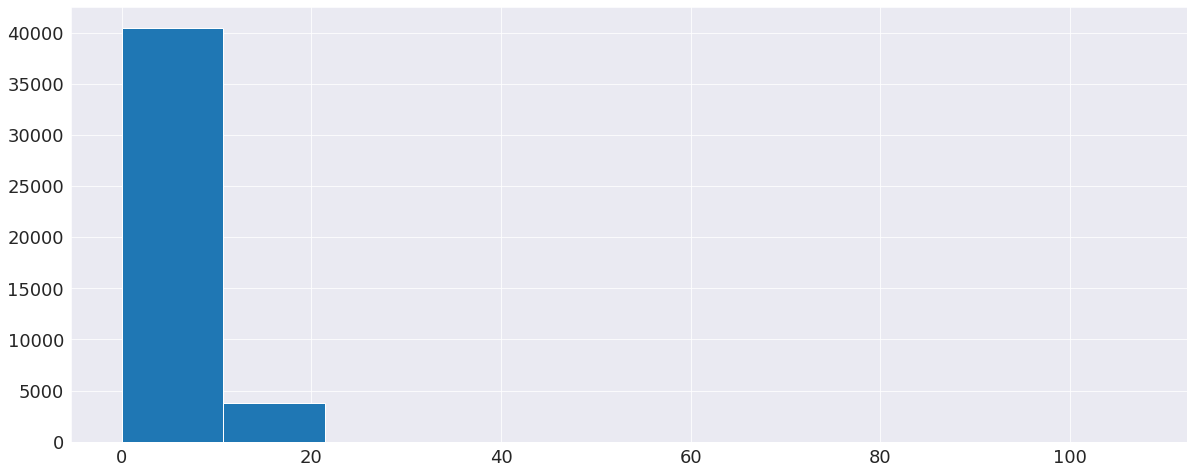

In [25]:
plt.hist(data['sentence_length'])


In [26]:
data['contains_number'] = data['clean_headline'].apply(lambda x: bool(re.search(r'\d+', x)))
data

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
0,supreme court votes 7-2 to legalize all worldl...,1,"ORG,CARDINAL",supreme court vote 7 2 legalize worldly vices,8,True
1,hungover man horrified to learn he made dozens...,1,"CARDINAL,TIME",hungover man horrify learn make dozens plan la...,9,False
2,emily's list founder: women are the 'problem s...,0,ORG,emily list founder women problem solvers congress,7,False
3,send your kids back to school with confidence,0,,send kid back school confidence,5,False
4,watch: experts talk pesticides and health,0,,watch experts talk pesticides health,5,False
...,...,...,...,...,...,...
44257,greece seeks to reassure europe as tensions rise,0,LOC,greece seek reassure europe tensions rise,6,False
44258,vatican says transgender man cannot become a g...,0,ORG,vatican say transgender man cannot become godp...,7,False
44259,protesters ejected from donald trump rally aft...,0,,protesters eject donald trump rally hold pocke...,8,False
44260,italian recipes that are oldies but goodies,0,NORP,italian recipes oldies goodies,4,False


In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [28]:
sentences = data['clean_headline']
label = data['is_sarcastic']

In [29]:
X_train, X_val, y_train, y_val = train_test_split(sentences, label, test_size=0.2, stratify=label, random_state=42)

In [47]:
X_train

array([[3123, 2474,  581, ...,    0,    0,    0],
       [ 675,   75,  333, ...,    0,    0,    0],
       [ 233,   96,   63, ...,    0,    0,    0],
       ...,
       [ 156,  557, 1635, ...,    0,    0,    0],
       [ 125, 2925, 1513, ...,    0,    0,    0],
       [ 129,  181, 4982, ...,    0,    0,    0]], dtype=int32)

In [36]:
max_len = 20       
oov_token = '00_V' 
padding_type = 'post'
trunc_type = 'post'  

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ",vocab_size)

Vocab Size:  19968


In [37]:
train_sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(val_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [40]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [layers.Dense(neurons, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.5)
        self.dropout2 = layers.Dropout(0.5)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [41]:
embed_dim = 50  
heads = 2  
neurons = 32
maxlen = 20
vocab_size = 20886

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerEncoder(embed_dim, heads, neurons)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = Dropout(0.35)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0003), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 token_and_position_embeddin  (None, 20, 50)           1045300   
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_encoder (Transf  (None, 20, 50)           23832     
 ormerEncoder)                                                   
                                                                 
 global_average_pooling1d (G  (None, 50)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 50)                0     

In [43]:
model_name = "model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0.001, patience = 1, verbose = 1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)

In [45]:
history = model.fit(X_train,y_train,
                    validation_data=(X_val,y_val),
                    epochs=25,
                    batch_size=32)

Epoch 1/25
1107/1107 [==============================] - 8s 8ms/step - loss: 0.1310 - accuracy: 0.9529 - val_loss: 0.3570 - val_accuracy: 0.8960
Epoch 2/25
1107/1107 [==============================] - 8s 8ms/step - loss: 0.0963 - accuracy: 0.9673 - val_loss: 0.3874 - val_accuracy: 0.9055
Epoch 3/25
1107/1107 [==============================] - 9s 8ms/step - loss: 0.0672 - accuracy: 0.9777 - val_loss: 0.4117 - val_accuracy: 0.9059
Epoch 4/25
1107/1107 [==============================] - 9s 8ms/step - loss: 0.0463 - accuracy: 0.9853 - val_loss: 0.4746 - val_accuracy: 0.9084
Epoch 5/25
1107/1107 [==============================] - 10s 9ms/step - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.5246 - val_accuracy: 0.9092
Epoch 6/25
1107/1107 [==============================] - 12s 11ms/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.5538 - val_accuracy: 0.9116
Epoch 7/25
1107/1107 [==============================] - 8s 7ms/step - loss: 0.0221 - accuracy: 0.9936 - val_loss: 0.5753 - val_accura

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [55]:
test_sequences = tokenizer.texts_to_sequences(test_d["headline"])
X_test = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [56]:
X_test

array([[  14,  347, 3403, ...,    0,    0,    0],
       [ 915, 1784, 9973, ...,    0,    0,    0],
       [ 404,  567, 6743, ...,    0,    0,    0],
       ...,
       [ 527, 5713, 1730, ...,    0,    0,    0],
       [ 510, 4793,  725, ...,    0,    0,    0],
       [5690,   88,  802, ...,    0,    0,    0]], dtype=int32)

In [62]:
y_pred = model.predict(X_test)
y_pred[y_pred>=0.85] = 1
y_pred[y_pred<0.85] = 0
res = pd.DataFrame(y_pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test datres.index = X_test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv',index = False)         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_pred[y_pred>=0.85] = 1
y_pred[y_pred<0.85] = 0